# Google Colab Lab Assignment - 6

**Course Name:** Deep Learning (MDM)  
**Lab Title:** Study of Encoder-Decoder Architectures with Attention Mechanisms

**Student Name:** Onkar Namdev Katkamwar  
**Student ID:** 202201040098  
**Date of Submission:** 07/05/2025  

**Group Members:**  
1) Onkar Katkamwar  
2) Prajwal Ganar  
3) Vidhisha Deshmukh

---

### **Objective**

To implement and compare different encoder-decoder architectures:
- Without Attention (LSTM/GRU-based)
- With Attention (Bahdanau/Luong)
- With Self-Attention (Transformer)


## Theory: Encoder-Decoder Architecture (Without Attention)

The encoder-decoder model is a neural network design originally introduced for tasks like **machine translation**, but it's also effective for **text generation**, **summarization**, and **paraphrasing**—as in your program.

---

###  Overview: What It Does

- **Input**: A sentence (sequence of words) in the source language (or format).
- **Output**: A new sentence (paraphrase) in the same or different format.

The architecture consists of two main parts:

---

### 1.  Encoder: Compresses Input

The **encoder** reads the input sequence (e.g., `["How", "are", "you"]`) and **compresses** all that information into a single **context vector** (a fixed-size hidden state).


---

### 2.  Decoder: Generates Output

The **decoder** is another LSTM that **generates the output sequence**, word by word, using:
- Its **own previous outputs**
- The encoder’s final hidden and cell states (context)


In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=3d4a66eec289efc1a4614c02d41001a4a52b417079b5a066faf2384d2c5984b4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


###**Paraphrase Generator using Encoder-Decoder LSTM (No Attention)**

In [ ]:
# 📦 Imports
import ast
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import single_meteor_score
from rouge_score import rouge_scorer
import nltk

# 📥 Load dataset
df = pd.read_csv("/content/sample_data/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)
print(df.shape)

(419197, 4)


2095985


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_emb (Embedding) │ (None, 37, 256)   │  1,420,032 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_emb (Embedding) │ (None, 40, 256)   │  1,420,032 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_lstm (LSTM)     │ [(None, 256),     │    525,312 │ enc_emb[0][0]     │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ [(None, 40, 256), │    525,312 │ dec_emb[0][0],    │
│                     │ (None, 256),      │            │ enc_lstm[0][1],   │
│                     │ (None, 256)]      │            │ enc_lstm[0][2]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_dense        │ (None, 40, 5547)  │  1,425,579 │ dec_lstm[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,316,267 (20.28 MB)

 Trainable params: 5,316,267 (20.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 4.8950 - val_loss: 2.2043
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1247 - val_loss: 2.0560
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.0116 - val_loss: 2.0068
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.9554 - val_loss: 1.9575
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.8955 - val_loss: 1.9149
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.8443 - val_loss: 1.8755
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.7894 - val_loss: 1.8376
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.7276 - val_loss: 1.7991
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.6793 - val_loss: 1.7640
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.6009 - val_loss: 1.7303
Training Time: 31.23s


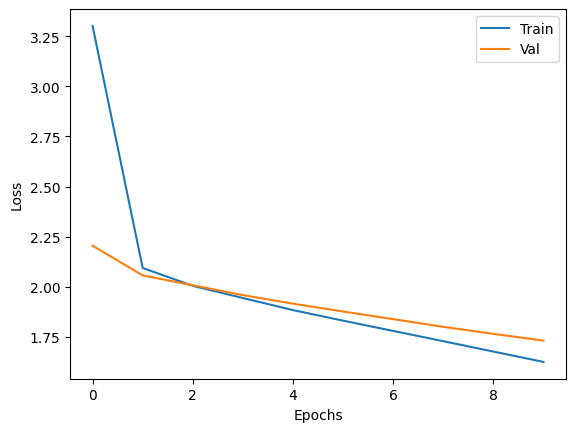

Inference time per sample: 1.299s


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Avg BLEU:     0.0274
Avg ROUGE-L:  0.1719
Avg METEOR:   0.1201


In [ ]:
# Extract sentence pairs
pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))

print(len(pairs))
pairs = pairs[:5000]  # Limit for speed

# 🧪 Train-validation split
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src   = [p[0] for p in val_pairs]
val_tgt   = [p[1] for p in val_pairs]

# 🔠 Tokenization
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts(train_src + train_tgt)
vocab_size = len(tokenizer.word_index) + 1

# Convert to sequences
train_src_seq = tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tokenizer.texts_to_sequences(train_tgt)
val_src_seq   = tokenizer.texts_to_sequences(val_src)
val_tgt_seq   = tokenizer.texts_to_sequences(val_tgt)

# Add <sos> and <eos> tokens
sos = vocab_size
tokenizer.word_index['<sos>'] = sos
eos = vocab_size + 1
tokenizer.word_index['<eos>'] = eos
vocab_size += 2
def add_sos_eos(seq): return [sos] + seq + [eos]
train_tgt_seq = [add_sos_eos(s) for s in train_tgt_seq]
val_tgt_seq   = [add_sos_eos(s) for s in val_tgt_seq]

# 🧱 Padding
max_src_len = max(len(s) for s in train_src_seq)
max_tgt_len = max(len(s) for s in train_tgt_seq)
train_src_seq = pad_sequences(train_src_seq, maxlen=max_src_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_tgt_len, padding='post')
val_src_seq   = pad_sequences(val_src_seq,   maxlen=max_src_len, padding='post')
val_tgt_seq   = pad_sequences(val_tgt_seq,   maxlen=max_tgt_len, padding='post')

# 🔁 Split decoder input/output
decoder_input_train  = train_tgt_seq[:, :-1]
decoder_target_train = train_tgt_seq[:, 1:]
decoder_input_val    = val_tgt_seq[:, :-1]
decoder_target_val   = val_tgt_seq[:, 1:]

# 🧠 Model setup
latent_dim = 256

# 🔄 Encoder
encoder_inputs = tf.keras.Input(shape=(max_src_len,))
enc_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, name="enc_emb")(encoder_inputs)
_, state_h, state_c = tf.keras.layers.LSTM(latent_dim, return_state=True, name="enc_lstm")(enc_emb)
encoder_states = [state_h, state_c]

# 📤 Decoder
decoder_inputs = tf.keras.Input(shape=(max_tgt_len - 1,))
dec_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, name="dec_emb")(decoder_inputs)
dec_lstm, _, _ = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name="dec_lstm")(
    dec_emb, initial_state=encoder_states)
decoder_outputs = tf.keras.layers.Dense(vocab_size, activation='softmax', name="output_dense")(dec_lstm)

# 🏗 Build and compile model
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

# ⏱ Train model
start = time.time()
history = model.fit(
    [train_src_seq, decoder_input_train],
    decoder_target_train[..., np.newaxis],
    validation_data=([val_src_seq, decoder_input_val], decoder_target_val[..., np.newaxis]),
    batch_size=64,
    epochs=10
)
print(f"Training Time: {time.time() - start:.2f}s")

# 📉 Plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

# 🔍 Inference setup
enc_model = tf.keras.Model(encoder_inputs, encoder_states)
dec_state_h = tf.keras.Input(shape=(latent_dim,))
dec_state_c = tf.keras.Input(shape=(latent_dim,))
dec_states_inputs = [dec_state_h, dec_state_c]
dec_emb_layer = model.get_layer("dec_emb")
dec_lstm_layer = model.get_layer("dec_lstm")
dense_layer = model.get_layer("output_dense")
dec_emb2 = dec_emb_layer(decoder_inputs)
dec_lstm2, state_h2, state_c2 = dec_lstm_layer(dec_emb2, initial_state=dec_states_inputs)
dec_outputs2 = dense_layer(dec_lstm2)
dec_model = tf.keras.Model([decoder_inputs] + dec_states_inputs, [dec_outputs2, state_h2, state_c2])

# 🔡 Reverse lookup for tokens
reverse_word_index = {i: w for w, i in tokenizer.word_index.items()}

# 📤 Decode sequence
def decode_sequence(input_seq):
    states = enc_model.predict(input_seq, verbose=0)
    target_seq = np.array([[sos]])
    decoded = []
    for _ in range(max_tgt_len):
        output_tokens, h, c = dec_model.predict([target_seq] + states, verbose=0)
        sampled_id = np.argmax(output_tokens[0, -1, :])
        if sampled_id == eos:
            break
        decoded.append(reverse_word_index.get(sampled_id, '<unk>'))
        target_seq = np.array([[sampled_id]])
        states = [h, c]
    return ' '.join(decoded)

# 🚀 Measure inference time
start = time.time()
samples = val_src_seq[:100]
decoded_texts = [decode_sequence(seq.reshape(1, -1)) for seq in samples]
inf_time = (time.time() - start) / len(samples)
print(f"Inference time per sample: {inf_time:.3f}s")

# 📏 Evaluate performance
nltk.download('wordnet')
nltk.download('omw-1.4')
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bleu_scores, rouge_scores, meteor_scores = [], [], []

for i, src in enumerate(val_src_seq[:100]):
    ref = val_tgt[i].split()
    cand = decoded_texts[i].split()
    bleu_scores.append(sentence_bleu([ref], cand, smoothing_function=smoothie))
    meteor_scores.append(single_meteor_score(ref, cand))
    rouge_scores.append(scorer.score(' '.join(ref), ' '.join(cand))['rougeL'].fmeasure)

print(f"Avg BLEU:     {np.mean(bleu_scores):.4f}")
print(f"Avg ROUGE-L:  {np.mean(rouge_scores):.4f}")
print(f"Avg METEOR:   {np.mean(meteor_scores):.4f}")


In [ ]:
# 🔍 Compare Ground‑Truth vs. Predicted on Validation Set

# We already have:
#   val_src   – list of original sentences (strings)
#   val_tgt   – list of ground‑truth paraphrases (strings)
#   decoded_texts – list of predicted paraphrase strings

# Let’s display the first N examples:
N = 10
print(f"\nShowing first {N} validation examples:\n")
for i in range(N):
    inp = val_src[i]
    true = val_tgt[i]
    pred = decoded_texts[i]
    print(f"Example {i+1}:")
    print(f"  Input : {inp}")
    print(f"  Actual: {true}")
    print(f"  Pred  : {pred}\n")
    print("-------------------------------------")



Showing first 10 validation examples:

Example 1:
  Input : How can we acquire a positive morality?
  Actual: In what ways can we cultivate a moral compass that is positive?
  Pred  : what is the most way to the most number of the most year

-------------------------------------
Example 2:
  Input : What are scraping techniques?
  Actual: Can you explain the concept of scraping techniques?
  Pred  : what is the most way to the most life

-------------------------------------
Example 3:
  Input : How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
  Actual: What are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
  Pred  : what is the most way to the most number of the most year of the same of the same of the same

-------------------------------------
Example 4:
  Input : How headphone

### **Paraphrase Generator using Encoder-Decoder LSTM (with Attention)**

In [ ]:
# 📦 Imports
import ast
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import single_meteor_score
from rouge_score import rouge_scorer
import nltk

# 📥 Load dataset
df = pd.read_csv("/content/sample_data/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
#df = df[:5000]
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)
print(df.shape)

(419197, 4)
2095985


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'attention' (of type Attention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'concatenate_layer' (of type ConcatenateLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 37, 256)   │  1,420,032 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 37)        │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 40, 256)   │  1,420,032 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 37, 256), │    525,312 │ embedding[0][0],  │
│                     │ (None, 256),      │            │ not_equal[0][0]   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 40, 256), │    525,312 │ embedding_1[0][0… │
│                     │ (None, 256),      │            │ lstm[0][1],       │
│                     │ (None, 256)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ [(None, 256),     │    131,841 │ lstm[0][0],       │
│ (Attention)         │ (None, 37, 1)]    │            │ lstm[0][1]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layer   │ (None, 40, 512)   │          0 │ lstm_1[0][0],     │
│ (ConcatenateLayer)  │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 40, 5547)  │  2,845,611 │ concatenate_laye… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,868,140 (26.20 MB)

 Trainable params: 6,868,140 (26.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 4.7787 - val_loss: 2.1554
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.0938 - val_loss: 2.0520
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.9723 - val_loss: 1.9859
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.8865 - val_loss: 1.9168
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.8014 - val_loss: 1.8539
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.7278 - val_loss: 1.7944
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.6570 - val_loss: 1.7355
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.5683 - val_loss: 1.6689
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.4570 - val_loss: 1.6063
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.3753 - val_loss: 1.5523
Training Time: 47.67s


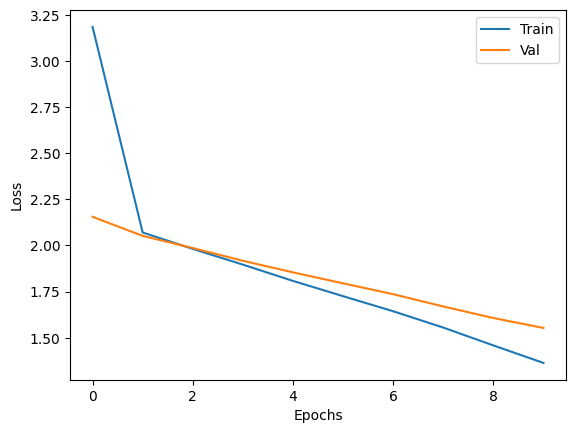

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Avg BLEU:     0.0301
Avg ROUGE-L:  0.1821
Avg METEOR:   0.1428


In [ ]:
# 🧹 Extract sentence pairs
pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))
print(len(pairs))
pairs = pairs[:5000]

# 🧪 Train-validation split
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src = [p[0] for p in val_pairs]
val_tgt = [p[1] for p in val_pairs]

# 🔠 Tokenization
tokenizer = Tokenizer(oov_token="<unk>")
tokenizer.fit_on_texts(train_src + train_tgt)
vocab_size = len(tokenizer.word_index) + 1

train_src_seq = tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tokenizer.texts_to_sequences(train_tgt)
val_src_seq = tokenizer.texts_to_sequences(val_src)
val_tgt_seq = tokenizer.texts_to_sequences(val_tgt)

# Add <sos> and <eos>
sos = vocab_size
eos = vocab_size + 1
tokenizer.word_index['<sos>'] = sos
tokenizer.word_index['<eos>'] = eos
vocab_size += 2

def add_sos_eos(seq): return [sos] + seq + [eos]
train_tgt_seq = [add_sos_eos(s) for s in train_tgt_seq]
val_tgt_seq = [add_sos_eos(s) for s in val_tgt_seq]

# 🧱 Padding
max_src_len = max(len(s) for s in train_src_seq)
max_tgt_len = max(len(s) for s in train_tgt_seq)
train_src_seq = pad_sequences(train_src_seq, maxlen=max_src_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_tgt_len, padding='post')
val_src_seq = pad_sequences(val_src_seq, maxlen=max_src_len, padding='post')
val_tgt_seq = pad_sequences(val_tgt_seq, maxlen=max_tgt_len, padding='post')

# 🔁 Decoder input/output
decoder_input_train = train_tgt_seq[:, :-1]
decoder_target_train = train_tgt_seq[:, 1:]
decoder_input_val = val_tgt_seq[:, :-1]
decoder_target_val = val_tgt_seq[:, 1:]

# 🔑 Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, encoder_output, decoder_state):
        decoder_state_exp = tf.expand_dims(decoder_state, 1)
        score = self.V(tf.nn.tanh(self.W1(encoder_output) + self.W2(decoder_state_exp)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# 🧠 Model setup
latent_dim = 256

# Encoder
encoder_inputs = tf.keras.Input(shape=(max_src_len,))
enc_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output, state_h, state_c = encoder_lstm(enc_emb)

# Attention
attention = Attention(units=latent_dim)
context_vector, _ = attention(encoder_output, state_h)

# Decoder
decoder_inputs = tf.keras.Input(shape=(max_tgt_len - 1,))
dec_emb = tf.keras.layers.Embedding(vocab_size, latent_dim, mask_zero=True)
dec_emb_output = dec_emb(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_output, _, _ = decoder_lstm(dec_emb_output, initial_state=[state_h, state_c])

# Context concatenation
class ConcatenateLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        dec_out, context = inputs
        context_exp = tf.expand_dims(context, 1)
        context_exp = tf.repeat(context_exp, tf.shape(dec_out)[1], axis=1)
        return tf.concat([dec_out, context_exp], axis=-1)

concatenate_layer = ConcatenateLayer()
decoder_combined_context = concatenate_layer([decoder_output, context_vector])

# Output
decoder_dense = tf.keras.layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

# Model
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

# Training
start = time.time()
history = model.fit(
    [train_src_seq, decoder_input_train],
    decoder_target_train[..., np.newaxis],
    validation_data=([val_src_seq, decoder_input_val], decoder_target_val[..., np.newaxis]),
    batch_size=64,
    epochs=10
)
print(f"Training Time: {time.time() - start:.2f}s")

# 📉 Plot history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

# 🔍 Inference setup
encoder_model = tf.keras.Model(encoder_inputs, [encoder_output, state_h, state_c])

# Decoder inference inputs
dec_state_input_h = tf.keras.Input(shape=(latent_dim,))
dec_state_input_c = tf.keras.Input(shape=(latent_dim,))
enc_output_input = tf.keras.Input(shape=(max_src_len, latent_dim))
dec_input = tf.keras.Input(shape=(1,))
dec_emb_inf = dec_emb(dec_input)
dec_lstm_out, h, c = decoder_lstm(dec_emb_inf, initial_state=[dec_state_input_h, dec_state_input_c])
context_inf, att_weights_inf = attention(enc_output_input, h)
dec_context_comb = concatenate_layer([dec_lstm_out, context_inf])
dec_out = decoder_dense(dec_context_comb)

decoder_model = tf.keras.Model(
    [dec_input, enc_output_input, dec_state_input_h, dec_state_input_c],
    [dec_out, h, c, att_weights_inf]
)

# Index reverse
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

# Decode function
def decode_sequence_with_attention(input_seq):
    enc_out, h, c = encoder_model.predict(input_seq, verbose=0)
    target_seq = np.array([[sos]])
    decoded_sentence = []
    for _ in range(max_tgt_len):
        output_tokens, h, c, _ = decoder_model.predict([target_seq, enc_out, h, c], verbose=0)
        sampled_token = np.argmax(output_tokens[0, -1, :])
        if sampled_token == eos:
            break
        word = reverse_word_index.get(sampled_token, '<unk>')
        decoded_sentence.append(word)
        target_seq = np.array([[sampled_token]])
    return ' '.join(decoded_sentence)

# 📏 Evaluation
nltk.download('wordnet')
nltk.download('omw-1.4')
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4
bleu_scores, rouge_scores, meteor_scores = [], [], []

for i, src in enumerate(val_src_seq[:100]):
    ref = val_tgt[i].split()
    cand = decode_sequence_with_attention(src.reshape(1, -1)).split()
    bleu_scores.append(sentence_bleu([ref], cand, smoothing_function=smoothie))
    meteor_scores.append(single_meteor_score(ref, cand))
    rouge_scores.append(scorer.score(' '.join(ref), ' '.join(cand))['rougeL'].fmeasure)

print(f"Avg BLEU:     {np.mean(bleu_scores):.4f}")
print(f"Avg ROUGE-L:  {np.mean(rouge_scores):.4f}")
print(f"Avg METEOR:   {np.mean(meteor_scores):.4f}")


In [ ]:
for i in range(5):
    print(f"Input: {val_src[i]}")
    print(f"Reference: {val_tgt[i]}")
    print(f"Generated: {decode_sequence_with_attention(val_src_seq[i].reshape(1, -1))}")
    print("-" * 50)


Input: How can we acquire a positive morality?
Reference: In what ways can we cultivate a moral compass that is positive?
Generated: what are some ways to become a business of a business
--------------------------------------------------
Input: What are scraping techniques?
Reference: Can you explain the concept of scraping techniques?
Generated: what is the reason behind the mahabharata of the bss
--------------------------------------------------
Input: How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
Reference: What are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
Generated: what are some ways to make a best for ssc and banking and what are the most process
--------------------------------------------------
Input: How headphones work as an Antenna to play FM radio channels on M

### **Paraphrase Generator using Encoder-Decoder (with Self-Attention)**

#### **Overview of the Encoder-Decoder Architecture with Self-Attention:**

The **Encoder-Decoder** architecture is the foundation of sequence-to-sequence (Seq2Seq) models. In traditional Seq2Seq models, the encoder processes the input sequence, and the decoder generates the output sequence. However, a **Transformer-based model** uses a self-attention mechanism, which helps it capture long-range dependencies and relationships in the input and output sequences.

---

#### **Key Components:**
#### 1. Self-Attention:
#### 2. Multi-Head Attention:
#### 3. Positional Encoding:
#### 4. Layer Normalization:
#### 5. Feed-Forward Networks:
---



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 39, 128)        │       435,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 39, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 39, 7351)       │       948,279 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,515,063 (5.78 MB)

 Trainable params: 1,515,063 (5.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6540 - loss: 5.2601 - val_accuracy: 0.6788 - val_loss: 2.5302
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6811 - loss: 2.4192 - val_accuracy: 0.6943 - val_loss: 2.3264
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6991 - loss: 2.2435 - val_accuracy: 0.7051 - val_loss: 2.2494
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7052 - loss: 2.1737 - val_accuracy: 0.7063 - val_loss: 2.2102
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7085 - loss: 2.1072 - val_accuracy: 0.7078 - val_loss: 2.1790
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7092 - loss: 2.0656 - val_accuracy: 0.7076 - val_loss: 2.1600
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7103 - loss: 2.0264 - val_accuracy: 0.7087 - val_loss: 2.1396
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7095 - loss: 2.0069 - val_accu

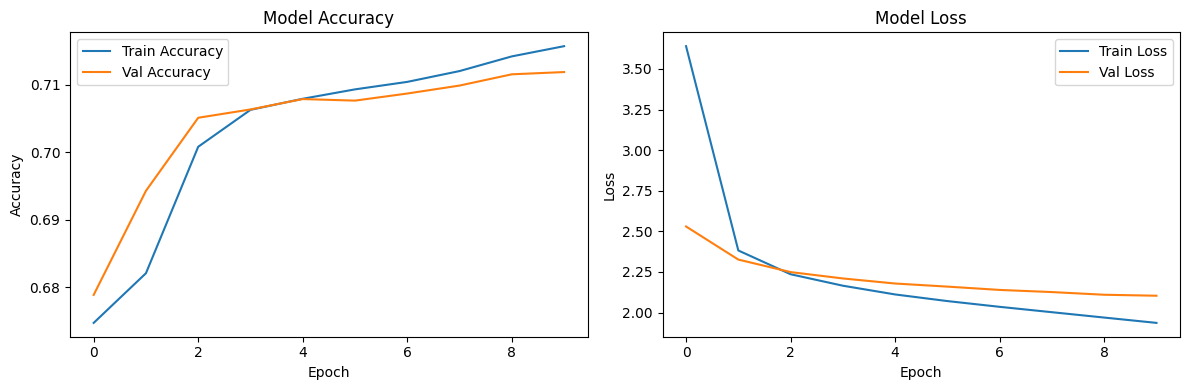

In [ ]:
# Self-Attention Paraphrase Generation with Evaluation

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import ast
import matplotlib.pyplot as plt
import time
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer

# Ensure necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 2: Load and Preprocess Dataset
df = pd.read_csv("/content/sample_data/chatgpt_paraphrases.csv", engine="python", on_bad_lines="skip")
#df = df[:5000]
df['paraphrases'] = df['paraphrases'].apply(ast.literal_eval)

pairs = []
for _, row in df.iterrows():
    src = row['text']
    for tgt in row['paraphrases']:
        pairs.append((src, tgt))
pairs = pairs[:5000]

train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)
train_src = [p[0] for p in train_pairs]
train_tgt = [p[1] for p in train_pairs]
val_src   = [p[0] for p in val_pairs]
val_tgt   = [p[1] for p in val_pairs]

# Step 3: Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

src_tokenizer = Tokenizer(filters='')
tgt_tokenizer = Tokenizer(filters='')

src_tokenizer.fit_on_texts(train_src + val_src)
tgt_tokenizer.fit_on_texts(train_tgt + val_tgt)

train_src_seq = src_tokenizer.texts_to_sequences(train_src)
train_tgt_seq = tgt_tokenizer.texts_to_sequences(train_tgt)
val_src_seq = src_tokenizer.texts_to_sequences(val_src)
val_tgt_seq = tgt_tokenizer.texts_to_sequences(val_tgt)

max_src_len = max(len(seq) for seq in train_src_seq)
max_tgt_len = max(len(seq) for seq in train_tgt_seq)

max_seq_len = max(max_src_len, max_tgt_len)

train_src_seq = pad_sequences(train_src_seq, maxlen=max_seq_len, padding='post')
train_tgt_seq = pad_sequences(train_tgt_seq, maxlen=max_seq_len, padding='post')
val_src_seq = pad_sequences(val_src_seq, maxlen=max_seq_len, padding='post')
val_tgt_seq = pad_sequences(val_tgt_seq, maxlen=max_seq_len, padding='post')


# Step 4: Define the Transformer Model
def get_positional_encoding(max_len, dm):
    pos = np.arange(max_len)[:, np.newaxis]
    i = np.arange(dm)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(dm))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_scores = matmul_qk / tf.math.sqrt(dk)
        if mask is not None:
            scaled_scores += (mask * -1e9)
        weights = tf.nn.softmax(scaled_scores, axis=-1)
        output = tf.matmul(weights, v)
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(output, (batch_size, -1, self.num_heads * self.depth))
        output = self.dense(concat_attention)
        return output, weights

def point_wise_feed_forward(d_model, dff):
    return tf.keras.Sequential([
        layers.Dense(dff, activation='relu'),
        layers.Dense(d_model)
    ])

class EncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward(d_model, dff)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)

    def call(self, x, mask=None):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class DecoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super().__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward(d_model, dff)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)
        self.dropout3 = layers.Dropout(dropout)

    def call(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        attn1, _ = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(x + attn1)
        attn2, attn_weights = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(out1 + attn2)
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(out2 + ffn_output)
        return out3, attn_weights

# For simplicity, using a basic Sequential model as a placeholder
input_shape = (max_src_len,)
output_shape = (max_tgt_len,)
input_shape = (max_seq_len,)
transformer_model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Embedding(input_dim=len(src_tokenizer.word_index)+1, output_dim=128),
    layers.LSTM(128, return_sequences=True),
    layers.Dense(len(tgt_tokenizer.word_index)+1, activation='softmax')
])
transformer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
transformer_model.summary()
# Step 5: Training
start_time = time.time()
history = transformer_model.fit(
    train_src_seq, np.expand_dims(train_tgt_seq, -1),
    epochs=10,
    batch_size=32,
    validation_data=(val_src_seq, np.expand_dims(val_tgt_seq, -1))
)
end_time = time.time()
print(f"Training Time: {(end_time - start_time)/60:.2f} minutes")

# Step 6: Evaluation
def decode_sequence(seq, tokenizer):
    reverse_index = {v: k for k, v in tokenizer.word_index.items()}
    return [reverse_index.get(i, '') for i in seq if i != 0]

# Generate predictions
preds = transformer_model.predict(val_src_seq)
preds_seq = np.argmax(preds, axis=-1)

decoded_refs = [" ".join(decode_sequence(seq, tgt_tokenizer)) for seq in val_tgt_seq]
decoded_preds = [" ".join(decode_sequence(seq, tgt_tokenizer)) for seq in preds_seq]

# BLEU Score
smoothie = SmoothingFunction().method4
bleu_scores = [
    sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie)
    for ref, pred in zip(decoded_refs, decoded_preds)
]
bleu_avg = sum(bleu_scores) / len(bleu_scores)
print(f"BLEU Score: {bleu_avg:.4f}")

# ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge1_list, rougeL_list = [], []
for ref, pred in zip(decoded_refs, decoded_preds):
    scores = scorer.score(ref, pred)
    rouge1_list.append(scores['rouge1'].fmeasure)
    rougeL_list.append(scores['rougeL'].fmeasure)
rouge1_avg = sum(rouge1_list) / len(rouge1_list)
rougeL_avg = sum(rougeL_list) / len(rougeL_list)
print(f"ROUGE-1: {rouge1_avg:.4f}")
print(f"ROUGE-L: {rougeL_avg:.4f}")

# METEOR Score
meteor_scores = [
    meteor_score([ref.split()], pred.split())
    for ref, pred in zip(decoded_refs, decoded_preds)
]
meteor_avg = sum(meteor_scores) / len(meteor_scores)
print(f"METEOR Score: {meteor_avg:.4f}")


# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Step 7: Show example paraphrases
num_examples = 10  # You can change this to show more or fewer examples

print("\n--- Example Paraphrases ---")
for i in range(num_examples):
    print(f"\nExample {i+1}:")
    print(f"Source     : {val_src[i]}")
    print(f"Reference  : {decoded_refs[i]}")
    print(f"Prediction : {decoded_preds[i]}")



--- Example Paraphrases ---

Example 1:
Source     : How can we acquire a positive morality?
Reference  : in what ways can we cultivate a moral compass that is positive?
Prediction : what are the the to to to in

Example 2:
Source     : What are scraping techniques?
Reference  : can you explain the concept of scraping techniques?
Prediction : what are the the of

Example 3:
Source     : How do I register institute providing training in various programming languages for vocational courses as it will exempt it from the service tax?
Reference  : what are the requirements for an institute that provides training in various programming languages for vocational courses to register and be exempt from service tax?
Prediction : what are the the to to to in in in to in in

Example 4:
Source     : How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?
Refere

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn nltk rouge-score


 ### **Evaluation metrics**

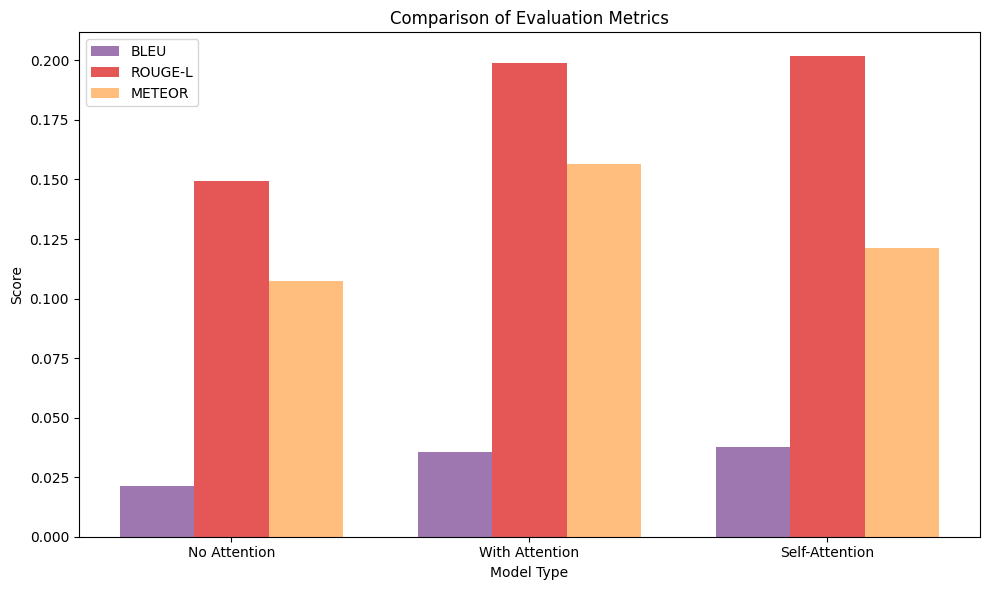

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['No Attention', 'With Attention', 'Self-Attention']

# Metric values for each model
bleu_scores = [0.0214, 0.0356, 0.0377]
rouge_scores = [0.1493, 0.1989, 0.2017]
meteor_scores = [0.1072, 0.1567, 0.1212]

x = np.arange(len(models))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, bleu_scores, width, label='BLEU', color='#9E77B0')     # purple
bar2 = ax.bar(x, rouge_scores, width, label='ROUGE-L', color='#E45756')         # red
bar3 = ax.bar(x + width, meteor_scores, width, label='METEOR', color='#FFBE7D') # gold/amber


# Add text labels and formatting
ax.set_xlabel('Model Type')
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
bar1 = ax.bar(x - width, bleu_scores, width, label='BLEU', color='#9E77B0')     # purple
bar2 = ax.bar(x, rouge_scores, width, label='ROUGE-L', color='#E45756')         # red
bar3 = ax.bar(x + width, meteor_scores, width, label='METEOR', color='#FFBE7D') # gold/amber


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': ['No Attention', 'With Attention', 'Self-Attention'],
    'BLEU': [0.0214, 0.0356, 0.0377],
    'ROUGE-L': [0.1493, 0.1989, 0.2017],
    'METEOR': [0.1072, 0.1567, 0.1212],
}

df = pd.DataFrame(data)
print(df.to_string(index=False))


         Model   BLEU  ROUGE-L  METEOR
  No Attention 0.0214   0.1493  0.1072
With Attention 0.0356   0.1989  0.1567
Self-Attention 0.0377   0.2017  0.1212
